# Overview
This notebook contains my exploration of the bakery sales data.

## Objectives
1. Understand changes in daily revenue for the timespan covered
    * Explain any anomalies using context (holidays, lockdowns, etc)
2. Calculate exact delivery fee for each transaction
    * Calculate item charges using counts and prices
    * Subtract item charge from total charges to determine delivery fee
3. Analyze delivery fee in the context of delivery location
    * Increased fees with longer delivery is probable
    * Are delivery fees associated with the 'place' or are they more specific?
    * Can we figure out 'close' and 'far' within a place just based on delivery fee differences?
4. Understand delivery locations and their trends
    * Do certain areas order during a certain time of day?
    * Do certain areas purchase more items on average?
    * Do certain areas purchase more in terms of revenue?
    * Did certain areas have increased/decreased activity weeks or months?
    * Do certain areas purchase more of an item than others?
5. Analyze how products sold
    * Which items sold the most?
    * Which items sold the least?
    * Which item had the highest revenue?
    * Are there significant increases or decreases in certain items sold during holidays or otherwise?
    * Are any items being disproportionately bought by certain areas?
6. Create a Tableau heatmap for locations and sales

## Findings

## Ideas
- Feature for each place (one-hot encoded for the transaction), so that day aggregation can also count number of orders from a place

# Pre-Exploration Checks
Imports...

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle

Prepare for exploration...

In [2]:
# wrangle data
sales, prices = wrangle.prep_explore()
daily_sales, non_rev_daily_sales = wrangle.drop_zero_rev_days(sales)

sales.shape, daily_sales.shape

((2294, 26), (297, 24))

Check univariate distributions of total revenues...

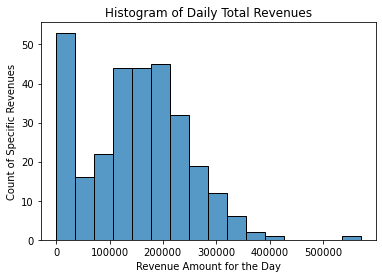

In [3]:
# plot histogram of daily revenue totals
sns.histplot(daily_sales.total)
plt.title('Histogram of Daily Total Revenues')
plt.xlabel('Revenue Amount for the Day')
plt.ylabel('Count of Specific Revenues')
plt.show()

Check barplot for location counts...

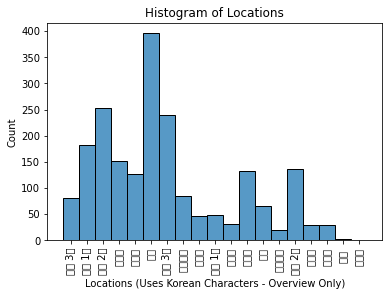

In [4]:
# barplot of location counts
sns.histplot(sales.place)
plt.title('Histogram of Locations')
plt.xlabel('Locations (Uses Korean Characters - Overview Only)')
plt.xticks(rotation=90)
plt.show()

Check univariate distributions of item counts...

In [5]:
# sum each item count column for categorical plot
total_item_counts = daily_sales.drop(columns='total').sum(axis=0)
total_counts_df = pd.DataFrame(total_item_counts, columns=['count'])

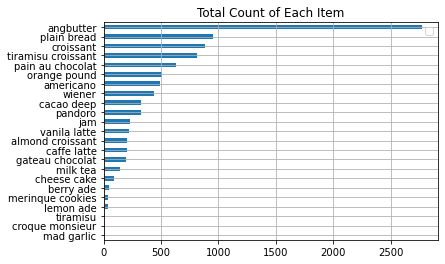

In [6]:
# plot each item's total count
total_counts_df.sort_values(by='count').plot.barh(grid=True)
plt.title('Total Count of Each Item')
plt.legend('')
plt.show()

Everything looks good, let's complete our objectives!

# 1. Understand changes in daily revenue for the timespan covered
1. Check moving averages to see periods of increased or decreases sales
2. Conduct domain research to see if observed changes are explainable
3. Conduct domain research to see if any events (in theory) should have an impact, but don't

In [7]:
# 1.
# plot daily sales and weekly sales
# overlay moving averages on top of daily and weekly sales plots

In [8]:
# 2. 
# markdown: list observed increases or decreases (and exact changes)
# markdown: investigate these increases or decreases

In [9]:
# 3. 
# markdown: look up major events for the city and country
# markdown: look at chart to see if major events are reflected (list exact changes for events)

# 2. Calculate exact delivery fee for each transaction
1. In non-aggregated sales dataframe, multiply item counts and item prices
2. Subtract this amount from the total transaction charge
3. Append this column of remaining charges (assumed as delivery charge) to dataframe

In [10]:
# 1.
# new dataframe where item counts are substituted by count * price

In [11]:
# 2.
# new column 'items_charge' in original dataframe which sums new dataframe's charges row-wise

In [12]:
# 3.
# new column 'delivery_charge' which subtracts 'items_charge' from 'total'

# 3. Analyze delivery fee in the context of delivery location
1. Group each transaction's delivery fees by location (average)
2. Check minimum and maximum delivery fee by location
3. Check distribution of delivery fee by location if delivery fee varies
4. If fee varies, and distribution isn't even:
    * Try to locate the bakery in the city
    * Check distances from the bakery to the neighborhoods

In [13]:
# 1. 
# group location by average delivery fee

In [14]:
# 2.
# print each location's minimum delivery fee
# print each location's maximum delivery fee

In [15]:
# 3.
# if there's a difference between minimum and maximum delivery fees by area,
# plot histograms for each location for the delivery fees

In [16]:
# 4.
# if the distribution indicates a sub-location pricing,
# use location delivery fee averages to get a general location of the bakery (larger average fee = more distant)
# select close, medium, and far bins for each location to get sub-location information for each transaction

# 4. Understand delivery locations and their trends
## Do certain areas order during a certain time of day?
1. Bin business time by hour
2. Create crosstab of place and hour for count of transactions
3. Check for anomalies

In [17]:
# 1.
# create bins for each hour in the day in new column (transaction happened in hour 0, hour 1, ... hour 23)
# plot distribution of each hour's number of transactions (value counts)

In [18]:
# 2.
# create crosstab of location column and transaction_hour column for all transactions

In [19]:
# 3.
# markdown: capture anything noteworthy

## Do certain areas purchase more items on average?
1. Sum total item counts by transaction in new column
2. Group by location for total item counts (average)

In [20]:
# 1.
# use individual transaction dataframe to sum row-wise in 'total_items' column
# group by location on 'total_items' column (average)

## Do certain areas purchase more in terms of revenue?
1. Group by location for total transaction costs (sum totals)
2. Group by location for total transaction costs (average)

In [21]:
# 1.
# group by location for total charges (sum totals)

In [22]:
# 2.
# group by location for total charges (average)

## Did certain areas have increased/decreased activity weeks or months?
1. Plot each location's total charges over time
2. Plot each location's total item counts over time

In [23]:
# 1.
# new column in individual transaction dataframe for binned transaction week 
# (transaction in week 1, 2, ... final week)
# group by week in terms of total charges
# plot line chart for each location in terms of weekly totals
# group by month in terms of total charges (index.month)
# plot line chart for each location in terms of monthly totals

In [24]:
# 2.
# group by week in terms of total item counts
# plot line chart for each location in terms of weekly item totals
# group by month in terms of total item counts (index.month)
# plot line chart for each location in terms of monthly item totals

## Do certain areas purchase more of an item than others?
1. For each item, group location for total purchases of that item
2. Plot location and each total amount purchased of that item

In [25]:
# 1.
# iterate through item columns, group location in terms of count of the item column
# for each item, plot bar chart for total purchases (x axis is location)

# 5. Analyze how products sold
## Which items sold the most? Which items sold the least? Which item had the highest revenue?
1. Sum item columns' counts
2. Find highest and lowest three counts
3. Multiply item totals by prices
4. Determine top-three-revenue items

In [26]:
# 1.
# column-wise sum of item counts

In [27]:
# 2.
# sort by count, get head 3 and tail 3

In [28]:
# 3.
# multiply each item count sum by the respective price of the item

In [29]:
# 4.
# note top-3 revenue items

## Are there significant increases or decreases in certain items sold during holidays or otherwise?
1. Use previous list of major events to select certain days
2. Check average sales of each item for week prior and week ahead (if week does not end up on another holiday)
3. Compare average sales of week prior and week ahead to the day in question for each item

In [30]:
# 1.
# select each eventful day

In [31]:
# 2.
# calculate week prior and week ahead averages for each item's total sale counts

In [32]:
# 3.
# compare week prior and week ahead averages to the event day's total

## Are any items being disproportionately bought by certain areas?
1. Check each item's total sales for each area
2. Calculate each area's total item sales
3. Calculate proportion of individual totals to grand total
4. Compare proportions for each area to see if there's high or low purchase numbers proportionately

In [33]:
# 1.
# iterate through each item and each location
# store location and bought-amount for each item

In [34]:
# 2.
# calculate total item sales count by location

In [35]:
# 3.
# for each location, divide total item sales by each specific item's counts
# store location and each item's sale proportions

In [36]:
# 4.
# compare proportions on each item+location combination
# note places with high or low proportions

# 6. Create a Tableau heatmap for locations and sales
1. If not done in section 3 step 4:
    * Figure out general location of bakery
    * Figure out general areas of the bakery's delivery locations
2. Map bakery and delivery locations in a clear way
3. Heatmap each boundary box in terms of sales revenue
    * Also consider controlling for delivery charge or displaying delivery charge in context display
4. Heatmap each boundary box in terms of specific item sale counts

In [37]:
# markdown: put work here